In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')

In [360]:
df1=pd.read_csv("C:\\Users\\swapn\\Desktop\\DS learning\\Data Science project\\Unemployment in Covid\\archive\\Unemployment in India.csv")

In [361]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [362]:
df1.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [363]:
df1.head(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
5,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412.0,43.01,Rural
6,Andhra Pradesh,30-11-2019,Monthly,4.12,11397681.0,41.00,Rural
7,Andhra Pradesh,31-12-2019,Monthly,4.38,12528395.0,45.14,Rural
8,Andhra Pradesh,31-01-2020,Monthly,4.84,12016676.0,43.46,Rural
9,Andhra Pradesh,29-02-2020,Monthly,5.91,11723617.0,42.83,Rural


In [364]:
df1.tail(10)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
758,NaN,NaN,NaN,NaN,NaN,NaN,NaN
759,NaN,NaN,NaN,NaN,NaN,NaN,NaN
760,NaN,NaN,NaN,NaN,NaN,NaN,NaN
761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [365]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [366]:
df1.rename(columns={'Region':'States',' Date':'Date',' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                   ' Estimated Employed':'Estimated Employed',' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)',
                   'Region.1':'Region'},inplace=True)

In [367]:
df1.isnull().sum()

States                                     28
Date                                       28
 Frequency                                 28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64

In [368]:
df1.duplicated().sum()

27

In [369]:
df1=df1.dropna()


In [370]:
# check for any null value
df1.isnull().sum()

States                                     0
Date                                       0
 Frequency                                 0
Estimated Unemployment Rate (%)            0
Estimated Employed                         0
Estimated Labour Participation Rate (%)    0
Area                                       0
dtype: int64

In [371]:
#checking for any duplicated row
df1.duplicated().sum()

0

In [372]:
def summary(df1):
    sum=pd.DataFrame(df1.dtypes, columns=['dtypes'])
    sum['missing']=df1.isna().sum()
    sum['missing']=(df1.isna().sum().values*100)/len(df1)
    sum['unique']=df1.nunique().values
    sum['count']=df1.count().values
    desc=pd.DataFrame(df1.describe().T)
    sum['min']=desc['min']
    sum['max']=desc['max']
    sum['mean']=desc['mean']
    return sum

In [373]:
summary(df1).style.background_gradient(cmap='YlOrRd')

,dtypes,missing,unique,count,min,max,mean
States,object,0.000000,28,740,nan,nan,nan
Date,object,0.000000,14,740,nan,nan,nan
Frequency,object,0.000000,2,740,nan,nan,nan
Estimated Unemployment Rate (%),float64,0.000000,624,740,0.000000,76.740000,11.787946
Estimated Employed,float64,0.000000,740,740,49420.000000,45777509.000000,7204460.025676
Estimated Labour Participation Rate (%),float64,0.000000,626,740,13.330000,72.570000,42.630122
Area,object,0.000000,2,740,nan,nan,nan


In [374]:
df1.drop(columns=[' Frequency'],inplace=True)

In [375]:
df1.columns

Index(['States', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Estimated employed by region

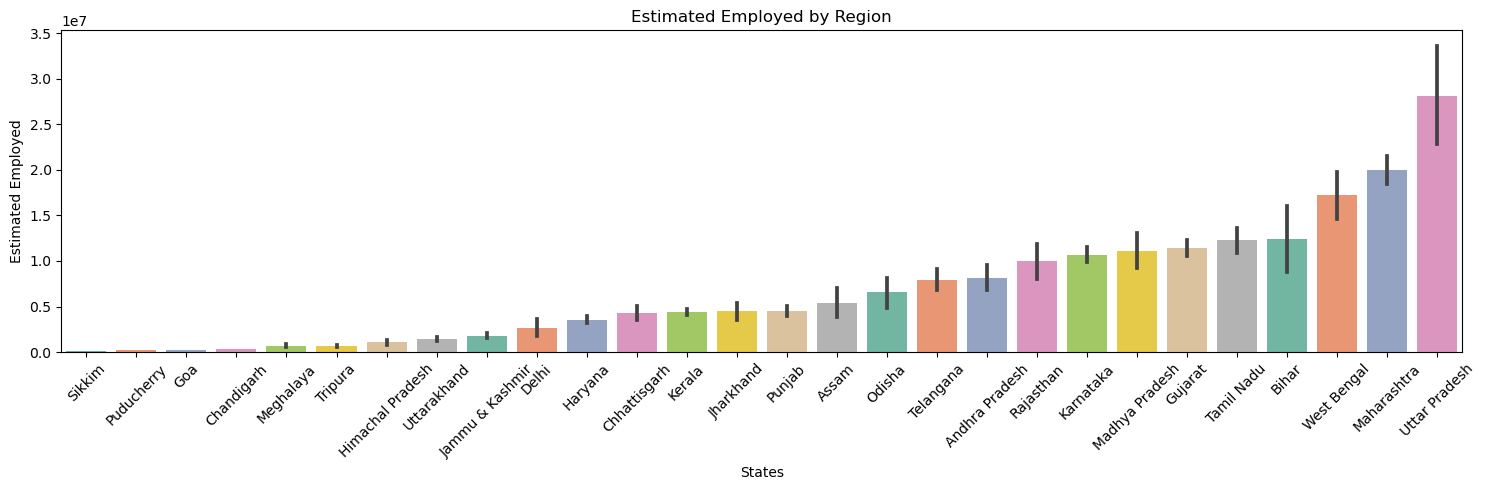

In [376]:
plt.figure(figsize=(15,5))
sns.barplot(data=df1, x='States', y='Estimated Employed',palette='Set2'
            ,order=df1.groupby('States')['Estimated Employed'].mean().sort_values().index)  
plt.title('Estimated Employed by Region') 
plt.xticks(rotation='45')
plt.tight_layout()

Estimated Unemployed Rates

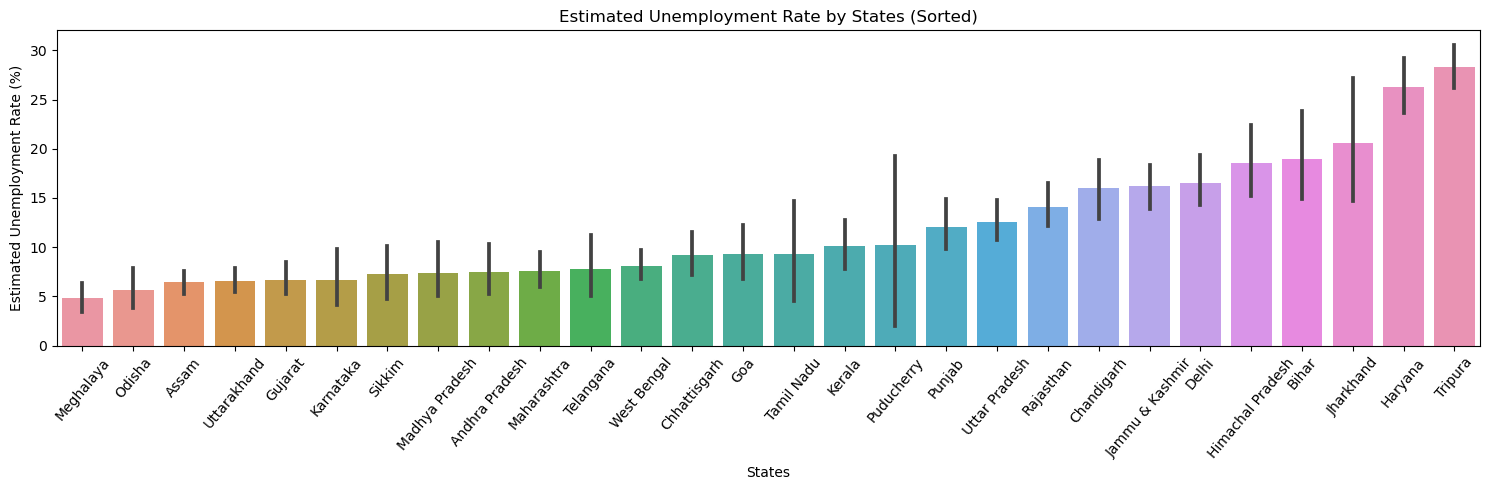

In [377]:
plt.figure(figsize=(15,5))
sns.barplot(data=df1,x='States',y='Estimated Unemployment Rate (%)',
            order=df1.groupby('States')['Estimated Unemployment Rate (%)'].mean().sort_values().index)
plt.xticks(rotation=50)
plt.xlabel('States')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate by States (Sorted)')
plt.tight_layout()
plt.show()

In [378]:
df1.columns

Index(['States', 'Date', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

Sunburst chart showing unemployment rate in each region and state


In [379]:
df1.corr()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
Estimated Unemployment Rate (%),1.000000,-0.222876,0.002558
Estimated Employed,-0.222876,1.000000,0.011300
Estimated Labour Participation Rate (%),0.002558,0.011300,1.000000


<AxesSubplot:>

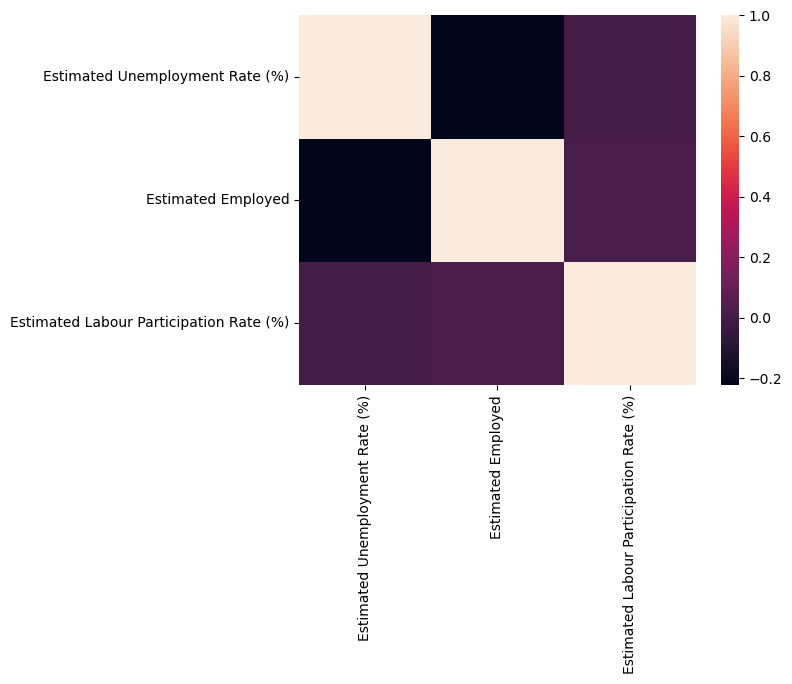

In [380]:
sns.heatmap(df1.corr())

# Analysis of Data

In [381]:
df1['Date']=pd.to_datetime(df1['Date'])
df1['Month']=df1['Date'].dt.month_name()
df1['Year']=df1['Date'].dt.year

In [382]:
df1['Year'].value_counts()

2019    430
2020    310
Name: Year, dtype: int64

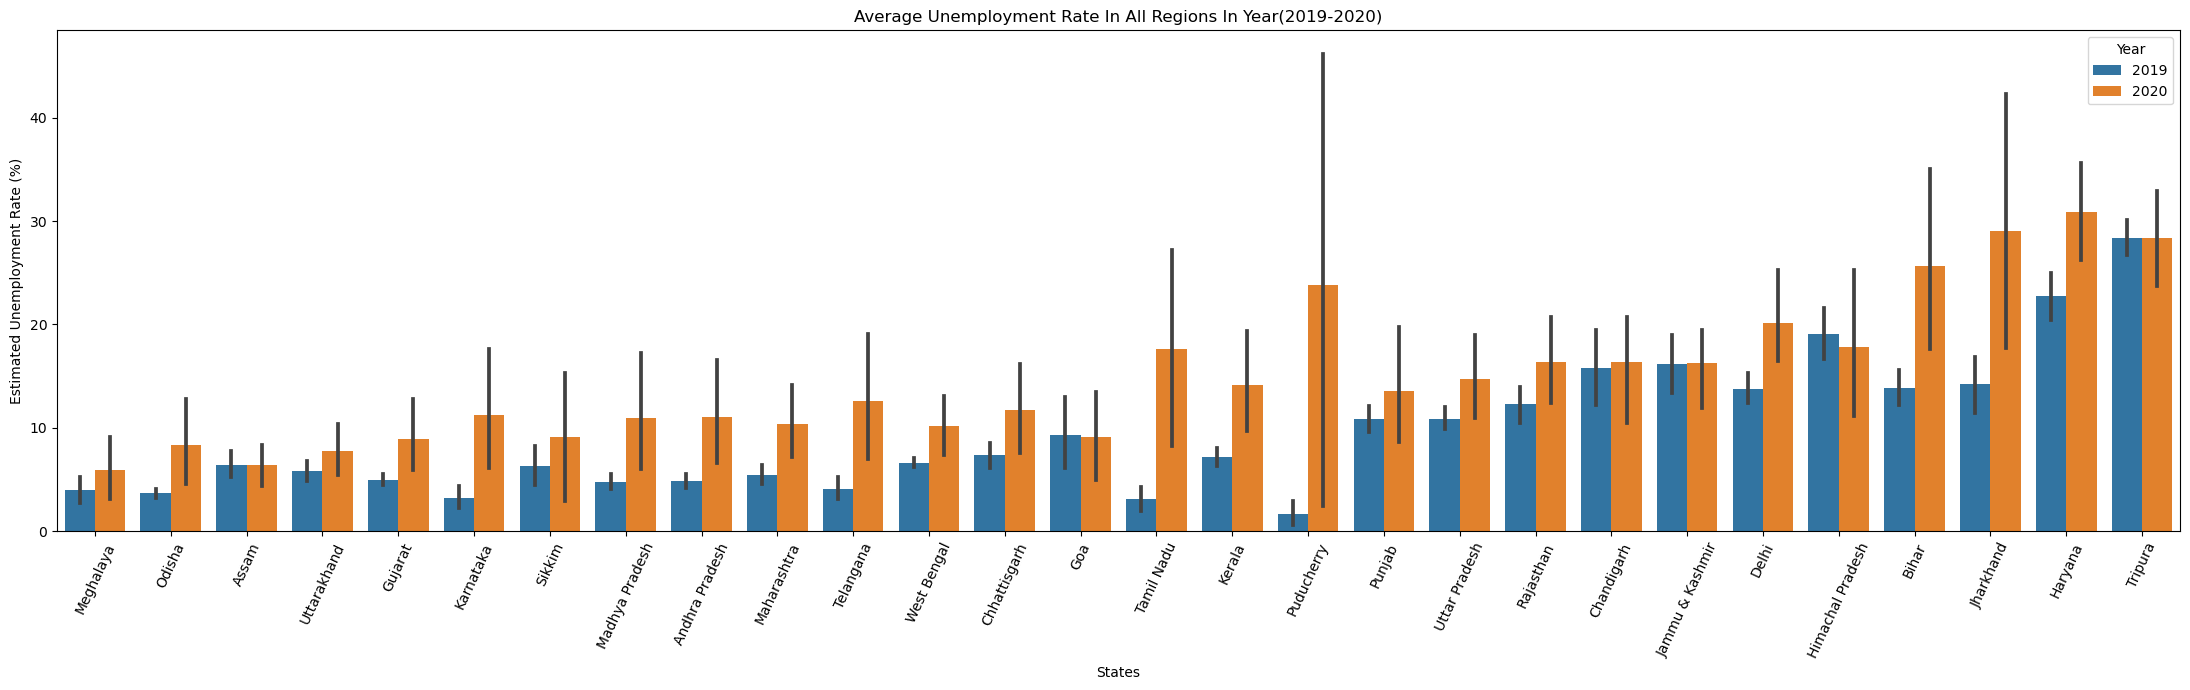

In [383]:
plt.figure(figsize=(22,7))
sns.barplot(data=df1,x='States',y='Estimated Unemployment Rate (%)',
            order=df1.groupby('States')['Estimated Unemployment Rate (%)'].mean().sort_values().index,hue='Year')
plt.title("Average Unemployment Rate In All Regions In Year(2019-2020)")
plt.xticks(rotation=65)
plt.tight_layout()
plt.show()

Estimated Unemployment Rate by year 2019- 2020

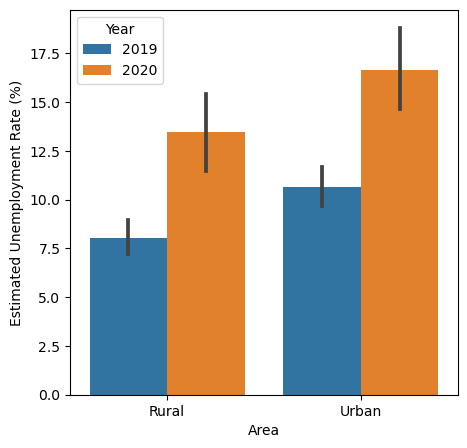

In [384]:
plt.figure(figsize=(5,5))
sns.barplot(data=df1,x='Area',y='Estimated Unemployment Rate (%)',hue='Year')
plt.show()

Mean Estimated Unemployment Rate over time

In [385]:
group=df1.groupby('Date')['Estimated Unemployment Rate (%)'].mean().reset_index()

In [386]:
group

,Date,Estimated Unemployment Rate (%)
0,2019-05-31,8.874259
1,2019-06-30,9.303333
2,2019-07-31,9.033889
3,2019-08-31,9.637925
4,2019-09-30,9.051731
5,2019-10-31,9.900909
6,2019-11-30,9.868364
7,2019-12-31,9.497358
8,2020-01-31,9.950755
9,2020-02-29,9.964717


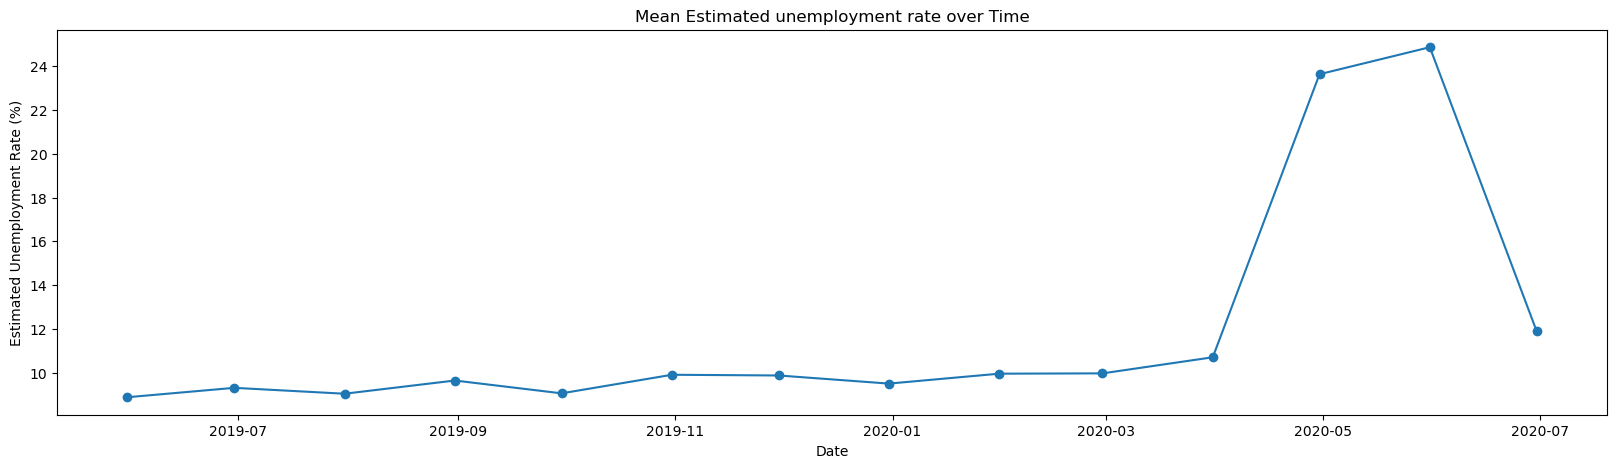

In [387]:
plt.figure(figsize=(20,5))
plt.plot(group['Date'],group['Estimated Unemployment Rate (%)'],marker='o')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Mean Estimated unemployment rate over Time')
plt.show()

#  Conclusions:





1) Meghalaya having lowest unemployment rate

2) After March 2020 unemployment increased drastically but after that in july month it decreased          drastically

3) Greater number of people are unemployed in Urban area that Rural area